KeyboardInterrupt: 

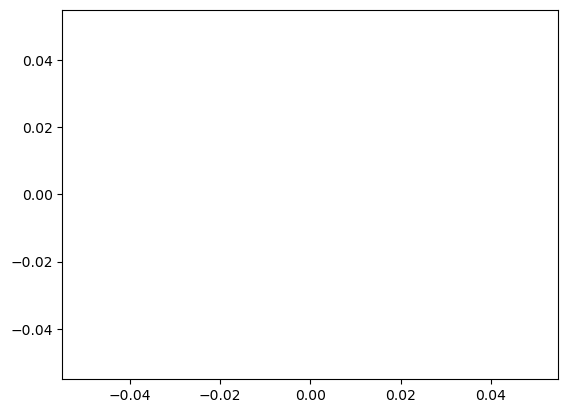

In [9]:
from typing import List, Dict, Any, Tuple
import gymnasium as gym
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import pickle
from random import randint 

class Qlearning_agent:

    def __init__(self, render_mode):
        self.env = gym.make("FrozenLake-v1",map_name="8x8", is_slippery=True,  render_mode='human'if render_mode else None) # change grid 
        
        # Create table for storing rewards
        self.rewards_table = np.zeros((64, 8))  # 16 states, 4 actions || change based on grid
        self.num_episodes = 15000 
        self.qtable = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        # Simple parameters
        self.learn_rate = 0.1
        self.discount = 0.9
        self.explore_chance = 0.3
        # self.reward = -0.
        self.epsilon = 1

        self.epsilon_decay_rate = 0.001

        self.random_num = np.random.default_rng()

        self.rewards_episodes = np.zeros(self.num_episodes)

    def learning(self):
        for i in range(self.num_episodes):
            self.state = self.env.reset()[0]

            self.stop = False
            self.excess = False 

            while not self.stop and not self.excess:
                if self.random_num.random() < self.epsilon:
                    self.action = self.env.action_space.sample()
                else:
                    self.action = np.argmax(self.qtable[self.state])
                
                self.new_state, self.reward, self.stop, self.excess, _ = self.env.step(self.action)

                self.qtable[self.state,self.action] = self.qtable[self.state,self.action] + self.learn_rate* (
                    self.reward + self.discount * np.max(self.qtable[self.new_state,:]) - self.qtable[self.state,self.action]
                )

                self.state = self.new_state
            self.epsilon = max(self.epsilon - self.epsilon_decay_rate, 0)

            if self.reward == 1:
                self.rewards_episodes[i] = 1
            
            if self.epsilon == 0:
                self.learn_rate = 0.0001
                
            for x in range(self.num_episodes):
                self.sum_rewards = np.sum(self.rewards_episodes[max(0, x-100):(x+1)]) 
            plt.plot(self.sum_rewards)
            plt.savefig('frozen_lake8x8.png')
            self.env.close()
    def save_model(self):

        self.file = open("frozen_lake8x8.pkl","wb")
        pickle.dump(self.qtable, self.file)
        self.file.close()
    
        

    def test(self):
        print("\nTesting the agent...")
        wins = 0
        tests = 100
        self.test_rewards  = np.zeros(tests)
        for j in range(tests):
            self.state = self.env.reset()[0]
            
            for step in range(self.max_steps):
                action = np.argmax(self.rewards_table[state])
                state, reward, done, _, _ = self.env.step(action)
                
                if done:
                    wins += reward  # reward is 1 for win, 0 for loss
                    break
            self.test_sum_rewards = np.sum(self.test_rewards[max(0, j-100):(j+1)])    
            plt.plot(self.test_sum_rewards)
            plt.savefig("frozen_lake8x8_test_resut.png")    
        print(f"Success rate: {(wins/tests)*100}%")

if __name__ == "__main__":
    agent = Qlearning_agent(False)
    agent.learning()
    agent.test()
    agent.save_model()



In [4]:
import numpy as np
rng = np.random.default_rng()
for i in range(10):
    print(f"random number: {rng.random()}")


random number: 0.20529137059929226
random number: 0.05997899229103554
random number: 0.5699301792115343
random number: 0.7359591974653195
random number: 0.7853342438206908
random number: 0.31030004241123943
random number: 0.0052420916767369485
random number: 0.9180982319240026
random number: 0.9821677832406975
random number: 0.09375740176314906
